## Exercises I - Required

Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer. 

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named `explore.ipynb`. In addition, you should create a file named `explore.py` that contains the following functions for exploring your variables (features & target).

In [44]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle
import explore_curr

In [19]:
# let's bring the data in and see what it looks like

df = wrangle.wrangle_telco()
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


<AxesSubplot:>

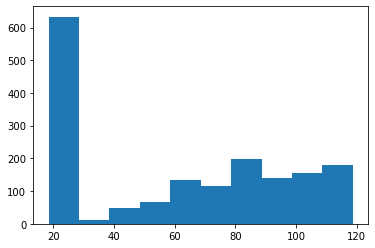

In [20]:
df['monthly_charges'].hist(grid=False, bins=10)

<AxesSubplot:>

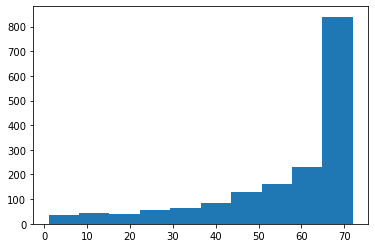

In [21]:
df['tenure'].hist(grid=False, bins=10)

<AxesSubplot:>

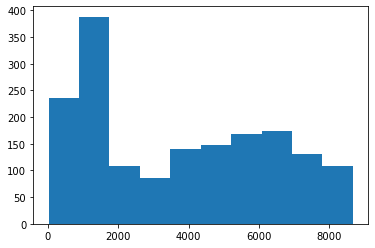

In [22]:
df['total_charges'].hist(grid=False, bins=10)

In [33]:
# can I make this into a clean function?

def telco_hist(df):
    col_list = ['monthly_charges', 'tenure', 'total_charges']
    for col in col_list:
        df[col].hist(grid=False, bins=10)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
    

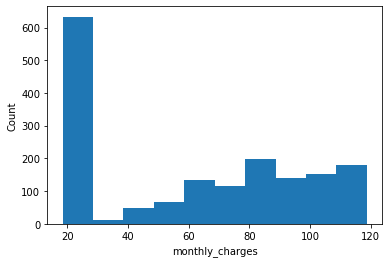

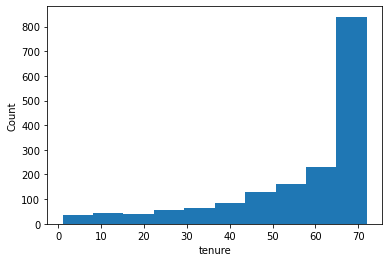

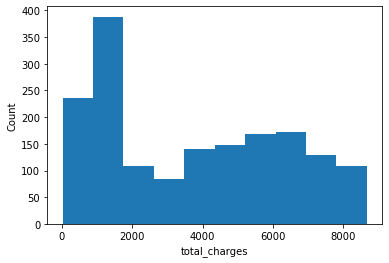

In [34]:
telco_hist(df)

1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [3]:
# banana time...

train, validate, test = wrangle.split_continuous(df)

train -> (943, 4)
validate -> (405, 4)
test -> (337, 4)


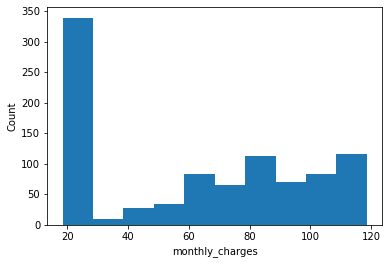

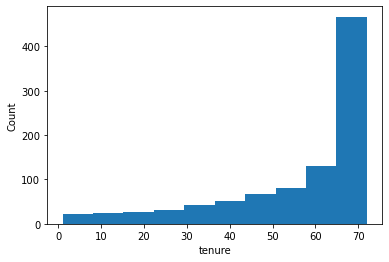

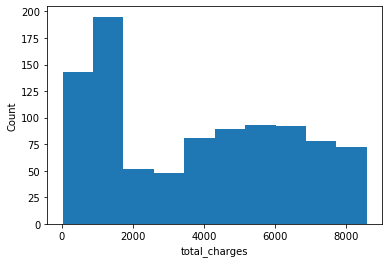

In [36]:
telco_hist(train)

In [4]:
# correlation matrix

telco_corr = train.drop(columns=['customer_id']).corr()
telco_corr

,monthly_charges,tenure,total_charges
monthly_charges,1.000000,0.447888,0.946568
tenure,0.447888,1.000000,0.654208
total_charges,0.946568,0.654208,1.000000


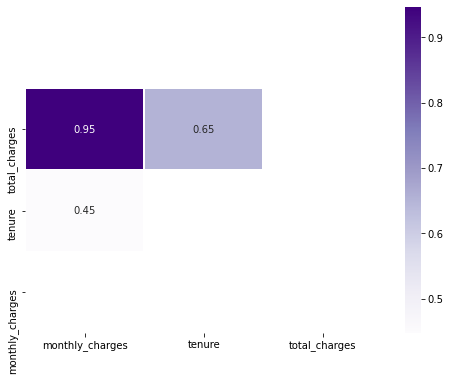

In [7]:
# heatmap

plt.figure(figsize=(8,6))
sns.heatmap(telco_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(telco_corr))
plt.ylim(0, 4)

plt.show()

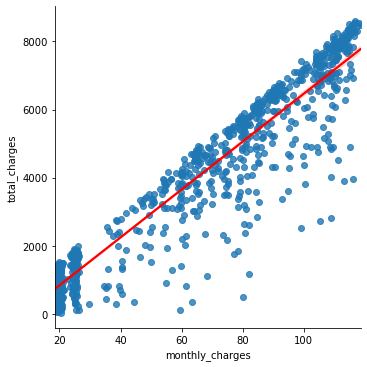

In [28]:
sns.lmplot(x="monthly_charges", y="total_charges", data=train, line_kws={'color': 'red'})
plt.show()

In [45]:
# let's scale the data and see what happens...

scaler = sklearn.preprocessing.MinMaxScaler()

scaled = scaler.fit_transform(train[['monthly_charges']])
train['monthly_charges_scaled'] = scaled

(array([339.,   9.,  27.,  35.,  84.,  65., 113.,  71.,  84., 116.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

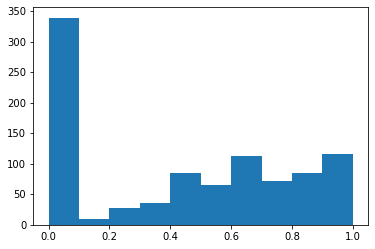

In [46]:
plt.hist(train.monthly_charges_scaled)

In [42]:
def viz_scaled_data(scaler, scaler_name, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))
    
    gs = plt.GridSpec
    
    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax2 = fig.add_subplot(gs[1,1])
    
    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled_' + feature, title = scaler_name)
    
    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')
    
    ax3.hist(scaled)
    ax3.set(title = 'Scaled')
    plt.tight_layout();

In [47]:
viz_scaled_data(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'monthly_charges')

TypeError: 'type' object is not subscriptable

<Figure size 864x432 with 0 Axes>

2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Explore your dataset with any other visualizations you think will be helpful.

7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.